### I. Chuẩn bị môi trường:

In [7]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [8]:
# Hàm phụ trợ tính độ lỗi.

def compute_mse(y, preds):
    return ((y-preds)**2).mean()
def compute_rr(y,preds,train_y):
    baseline = train_y.mean()
    return 1 - compute_mse(y,preds) / compute_mse(y, baseline)

### Đọc dữ liệu lên xử lý

In [9]:
DATA = pd.read_csv("data_reformat.csv")

# Bổ sung thêm cột số lượng dịch vụ
def getNumOfServices(x):
    try:
        return len(json.loads(x.replace("'",'"')))
    except:
        pass
    return pd.NA
DATA["numOfServices"] = DATA["other_service"].apply(getNumOfServices)

# Xem sơ qua dữ liệu
DATA.info()
# Thống kê cơ bản
DATA.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   website_id                               5801 non-null   object 
 1   website                                  5801 non-null   object 
 2   url                                      5801 non-null   object 
 3   full_name                                5801 non-null   object 
 4   phone                                    2435 non-null   object 
 5   district                                 5801 non-null   object 
 6   rate                                     5801 non-null   float64
 7   rate_count                               5801 non-null   float64
 8   favorite                                 3927 non-null   float64
 9   active_time                              5801 non-null   object 
 10  price_from                               5801 no

,rate,rate_count,favorite,price_from,price_to,monday_open,monday_close,tuesday_open,tuesday_close,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,sunday_open,sunday_close
count,5801.000000,5801.000000,3927.000000,5.801000e+03,5.801000e+03,5783.000000,5783.000000,5787.000000,5787.000000,5787.000000,5787.000000,5785.000000,5785.000000,5786.000000,5786.000000,5783.000000,5783.000000,5761.000000,5761.000000
mean,5.819203,62.664388,41.939649,5.825490e+04,4.733293e+05,8.453139,20.179587,8.464677,20.185260,8.474662,20.175917,8.474898,20.177148,8.468839,20.172834,8.438723,20.182227,8.405164,20.201892
std,3.676943,153.641717,163.079957,1.455547e+05,2.248216e+06,4.418259,5.221462,4.414098,5.207387,4.411955,5.215470,4.410622,5.215819,4.412386,5.225363,4.436966,5.233537,4.475502,5.247239
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.500000,20.000000,7.000000,20.000000,7.000000,20.000000,7.000000,20.000000,7.000000,20.000000,6.500000,20.000000,6.500000,20.000000
50%,7.586000,3.000000,2.000000,2.000000e+04,1.000000e+05,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000
75%,8.600000,32.000000,17.000000,5.500000e+04,3.000000e+05,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000
max,10.000000,1000.000000,4746.000000,4.000000e+06,1.000000e+08,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333


### Học máy

#### Bài toán 1: Giả sử chúng ta cần tìm hiểu xem liệu rằng những quán ăn được mọi người đánh giá nhiều thì số lượng yêu thích của quán sẽ ra sao, liệu có theo 1 giả định nào đó không?

- Các dữ liệu liên quan là : `rate_count` và `favorite`(output)
- Vì 2 loại dữ liệu đều là giá trị liên tục nên chúng ta áp dụng mô hình học máy `linear regression` để kiểm tra tính tương quan là hợp lý.

In [117]:
# Tiền xử lý xóa bỏ những giá trị NAN trong 2 cột rate_count và favorite

tmp = DATA.dropna(subset=["rate_count","favorite"])
print("Số lượng mẫu data hiện có:", tmp.shape[0])
print()

# Chuẩn bị dữ liệu
# Chia bộ dữ liệu làm 2 phần là train và test trong đó test chiếm 20% và train 80%
# Với cách phân chia này phù hợp với lượng data hiện có là 3927 , testset sẽ sấp sĩ 785 mẫu

Số lượng mẫu data hiện có: 3927



Tham số mô hình:
[1.66050653]
3.351534588749466

Độ lỗi trên tập train:
Độ lỗi MSE: 10842.265197649605
Độ lỗi R^2: 0.6108484194870373
Độ lỗi trên tập test:
Độ lỗi MSE: 4620.229083019934
Độ lỗi R^2: 0.7851198506885622



C:\Users\thafnhlong\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


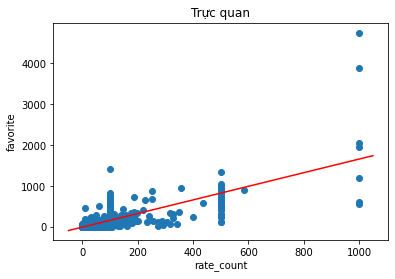

In [118]:
# Thực hiện huấn luyện

# Khởi tạo mô hình
model1 = linear_model.LinearRegression()

# Chia tập dữ liệu
X = tmp[["rate_count"]]
y = tmp["favorite"]
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

# Fit mô hình vào dữ liệu
model1.fit(train_X,train_y)

# Xem các tham số mô hình
print("Tham số mô hình:")
print(model1.coef_) #w_1...
print(model1.intercept_) #w_0
print()

# Trực quan mô hình 
plt.scatter(x=train_X,y=train_y)
plt.xlabel("rate_count")
plt.ylabel("favorite")
min_x, max_x = plt.xlim()
plt.plot([min_x,max_x],model1.predict(np.array([[min_x],[max_x]])), color="red")
plt.title("Trực quan")

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Độ lỗi MSE:", compute_mse(train_y,model1.predict(train_X)))
print("Độ lỗi R^2:", compute_rr(train_y,model1.predict(train_X),train_y))
print("Độ lỗi trên tập test:")
print("Độ lỗi MSE:", compute_mse(test_y,model1.predict(test_X)))
print("Độ lỗi R^2:", compute_rr(test_y,model1.predict(test_X),train_y))
print()

Độ lỗi trên tập train:
Độ lỗi MSE: 10717.638457176581
Độ lỗi R^2: 0.6177538186008218
Độ lỗi trên tập test:
Độ lỗi MSE: 5118.26037033007
Độ lỗi R^2: 0.7538502765821988



C:\Users\thafnhlong\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


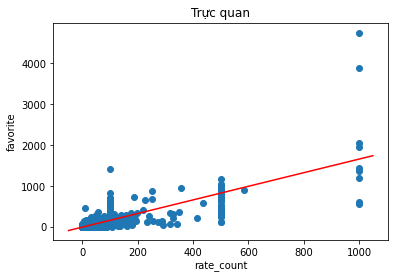

In [119]:
# Thử lai 1 lần nữa xem sự ảnh hưởng có thực sự lớn khi sử dụng cách chia training / test sets 80:20 hay không!
model2 = linear_model.LinearRegression()
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)
model2.fit(train_X,train_y)

# Trực quan mô hình 
plt.scatter(x=train_X,y=train_y)
plt.xlabel("rate_count")
plt.ylabel("favorite")
min_x, max_x = plt.xlim()
plt.plot([min_x,max_x],model1.predict(np.array([[min_x],[max_x]])), color="red")
plt.title("Trực quan")

print("Độ lỗi trên tập train:")
print("Độ lỗi MSE:", compute_mse(train_y,model1.predict(train_X)))
print("Độ lỗi R^2:", compute_rr(train_y,model1.predict(train_X),train_y))
print("Độ lỗi trên tập test:")
print("Độ lỗi MSE:", compute_mse(test_y,model1.predict(test_X)))
print("Độ lỗi R^2:", compute_rr(test_y,model1.predict(test_X),train_y))
print()

Nhận xét:
- Sau khi trải qua 2 model với cách chia 80:20 thì kết quả không thay đổi quá nhiều ( qua hình ảnh trực quan của hàm tuyến tính )
- Độ lỗi của R bình phương cho thấy có giá trị có thay đổi nhỏ, không lớn lắm

Điều đó chứng tỏ rằng kết quả không phụ thuộc quả nhiều vào cách chia bộ dữ liệu training set và test set.

Kết luận:
- Có thể thấy độ lỗi MSE của cả 2 mô hình có giá trị lớn đó cũng là do 1 phần outlier gây ra , việc thu thập dữ liệu không thể tránh khỏi
- Dựa vào hàm tuyến tính đã xác định được qua model thì ta có thể thấy rằng `favorite` tương quan với `rate_count` theo quan hệ đồng biến.
- Vậy mô hình đã giải quyết được bài toán mà chúng ta đã đề ra ban đầu

#### Bài toán 2: Giả sử chúng ta cần tìm hiểu xem liệu rằng những quán ăn có hỗ trợ dịch vụ: "nên đặt trước" thì giá cả sẽ ra sao, liệu có theo 1 giả định nào đó không?

- Các dữ liệu liên quan là : `price_from`, `price_to`, `s_nên đặt trước`(output)
- Ouput của bài toán là rời rạc: true/false 
- Vì 2 loại dữ liệu input đều là giá trị liên tục nên chúng ta không phải chuyển sang dạng định lượng nữa, và ouput là rời rạc dạng nhóm nên áp dụng mô hình học máy `logistic regression` để kiểm tra tính tương quan là hợp lý.

In [120]:
# Tiền xử lý

# Ta phải loại bỏ data của website: "ShopeeFood" vì nó không chứa bất kỳ dịch vụ nào để tránh nhiễu.
tmp = DATA[DATA["website"]!="ShopeeFood"]

print("Số lượng mẫu data hiện có:", tmp.shape[0])
print()

# Chuẩn bị dữ liệu
# Chia bộ dữ liệu làm 2 phần là train và test trong đó test chiếm 20% và train 80%
# Với cách phân chia này phù hợp với lượng data hiện có là 4901 , testset sẽ sấp xỉ 980 mẫu

Số lượng mẫu data hiện có: 4901



Tham số mô hình:
[[-1.09441743e-06  4.98709446e-09]]
[-1.5333935e-10]

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.15510204081632653
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.13761467889908258



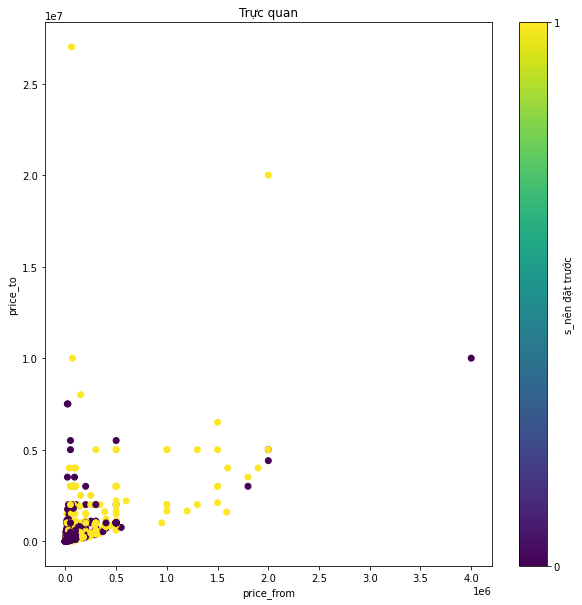

In [123]:
# Thực hiện huấn luyện

# Khởi tạo mô hình
model1 = linear_model.LogisticRegression()

# Chia tập dữ liệu
X = tmp[["price_from","price_to"]]
y = tmp["s_nên đặt trước"]
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

# Fit mô hình vào dữ liệu
model1.fit(train_X,train_y)

# Xem các tham số mô hình
print("Tham số mô hình:")
print(model1.coef_) #w_1...
print(model1.intercept_) #w_0
print()

# Trực quan quan hệ 
plt.figure(figsize=(10,10))
plt.scatter(train_X["price_from"],train_X["price_to"],c=train_y)
plt.colorbar(ticks=[0,1],label="s_nên đặt trước")
plt.xlabel("price_from")
plt.ylabel("price_to")
plt.title("Trực quan")

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != model1.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != model1.predict(test_X)))
print()

In [124]:
# Thử lai 1 lần nữa xem sự ảnh hưởng có thực sự lớn khi sử dụng cách chia training / test sets 80:20 hay không!
model2 = linear_model.LogisticRegression()
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)
model2.fit(train_X,train_y)

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != model2.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != model2.predict(test_X)))
print()

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.15637755102040815
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.13557594291539246



Nhận xét:
- Sau khi trải qua 2 model với cách chia 80:20 thì kết quả không thay đổi quá nhiều
- Độ lỗi Phần trăm phân lớp sai cho thấy có giá trị có thay đổi nhỏ, không lớn lắm

Điều đó chứng tỏ rằng kết quả không phụ thuộc quả nhiều vào cách chia bộ dữ liệu training set và test set.

Kết luận:
- Có thể thấy độ lỗi phân lớp cả 2 mô hình có giá trị khá nhỏ đó cũng là một dấu hiệu tốt cho thấy việc học máy hiệu quả với phương pháp logistic regression.
- Dựa vào tham số đã xác định được qua model thì ta có thể thấy rằng với `price_from` và `price_to` có thể xác đinh được phân lớp dịch vụ `nên đặt trước` (True/False).
- Vậy mô hình đã giải quyết được bài toán mà chúng ta đã đề ra ban đầu

Mở rộng bài toán qua phương pháp học máy Neural Network

In [125]:
# Tạo mạng neural network với các tham số :
# 1 tầng ẩn gồm 3 noron, hàm kích hoạt: tanh
# Thuật toán cực tiểu hóa: LBFGS, số vòng lặp tối đa: 1000
neural_net_model = MLPClassifier(hidden_layer_sizes=(3),activation="tanh",
                                solver="lbfgs", max_iter=1000,random_state=0)

# Fit mô hình vào tập huấn luyện
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)
neural_net_model.fit(train_X,train_y)

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != neural_net_model.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != neural_net_model.predict(test_X)))
print()

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.15306122448979592
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.1437308868501529



Tăng kích thước hiddenlayer và số tầng

In [128]:
# Tạo mạng neural network với các tham số :
# Hàm kích hoạt: logistic
# Tầng ẩn 1: gồm 30 noron
# Tầng ẩn 2: gồm 15 noron
# Thuật toán cực tiểu hóa: LBFGS, số vòng lặp tối đa: 1000
neural_net_model2 = MLPClassifier(hidden_layer_sizes=(30,15),activation="logistic",
                                solver="lbfgs", max_iter=1000,random_state=0)

# Fit mô hình vào tập huấn luyện
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)
neural_net_model2.fit(train_X,train_y)

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != neural_net_model2.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != neural_net_model2.predict(test_X)))
print()

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.15076530612244898
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.15392456676860347



Nhận xét:
- Qua 2 mô hình neural network thì kết quả về độ lỗi phân lớp khá giống nhau.
- Tùy vào hidden_layer_sizes thì thời gian chạy huấn luyện sẽ khác nhau, tuy nhiên độ lỗi cũng không được cải thiện nhiều.

#### Bài toán 3: Giả sử chúng ta cần tìm hiểu xem liệu rằng những quán ăn có hỗ trợ nhiều dịch vụ, hay số lượng yêu thích, hay số lượng đánh giá thì ảnh hướng tới RATE quán sẽ ra sao, liệu có theo 1 giả định nào đó không?

- Các dữ liệu liên quan là : `numOfServices`, `rate_count`, `favorite`, `rate`(output)
- Ouput của bài toán là giá trị rời rạc ["BAD","NORMAL","GOOD"]
- Vì các loại dữ liệu input đều là giá trị liên tục nên chúng ta không phải chuyển sang dạng định lượng nữa, output là dạng rời rạc nhóm > 2 nên áp dụng mô hình học máy `softmax regression` để kiểm tra tính tương quan là hợp lý.

- Chúng ta đi qua từng field để kiểm tra và tìm những field cho ra kết quả tốt nhất.

In [84]:
# Tiền xử lý
tmp = DATA

# Ta cần xử lý lại rating của quán về các giá trị rời rạc
def discrite(value):
    if value < 4:
        return "BAD"
    elif value < 8:
        return "NORMAL"
    return "GOOD"
tmp["f_rate"] = tmp["rate"].apply(discrite)

# Chuẩn bị dữ liệu
# Chia bộ dữ liệu làm 2 phần là train và test trong đó test chiếm 20% và train 80%
# Cách chia này sẽ ổn định cho các bản ghi > 1000 dòng. 

Tham số mô hình:
[[-1.00002967]
 [ 0.50147722]
 [ 0.49855245]]
[ 0.93951333 -0.53978918 -0.39972415]

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.40714285714285714
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.417940876656473



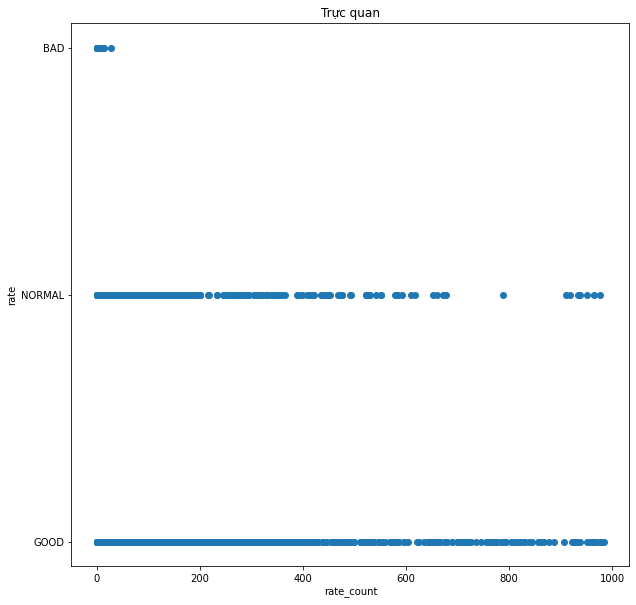

In [141]:
# FIELD : rate_count

# Loại bỏ các record nan
tmp1 = tmp.dropna(subset=["rate_count"])
X = tmp1[["rate_count"]]
y = tmp1["f_rate"]

# Chia 80:20
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

# Tạo model logistic đa lớp với thuật toán cực tiểu hóa: lbfgs, lặp 1e4
model1 = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1e4)
model1.fit(train_X,train_y)

# Xem các tham số mô hình
print("Tham số mô hình:")
print(model1.coef_) #w_1...
print(model1.intercept_) #w_0
print()

# Xem trực quan dữ liệu
plt.figure(figsize=(10,10))
plt.scatter(train_X["rate_count"],train_y)
plt.xlabel("rate_count")
plt.ylabel("rate")
plt.title("Trực quan")

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != model1.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != model1.predict(test_X)))
print()

Nhận xét: 
- Độ lỗi của mô hình khá cao, nhưng trong khoảng chấp nhận được, ít ra vẫn tốt hơn là baseline
- Việc chia training và test set không ảnh hưởng quá nhiều tới kết quả

Tham số mô hình:
[[-0.42919616]
 [ 0.21003039]
 [ 0.21916577]]
[ 0.97849641 -0.62528288 -0.35321353]

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.37835605121850474
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.3811881188118812



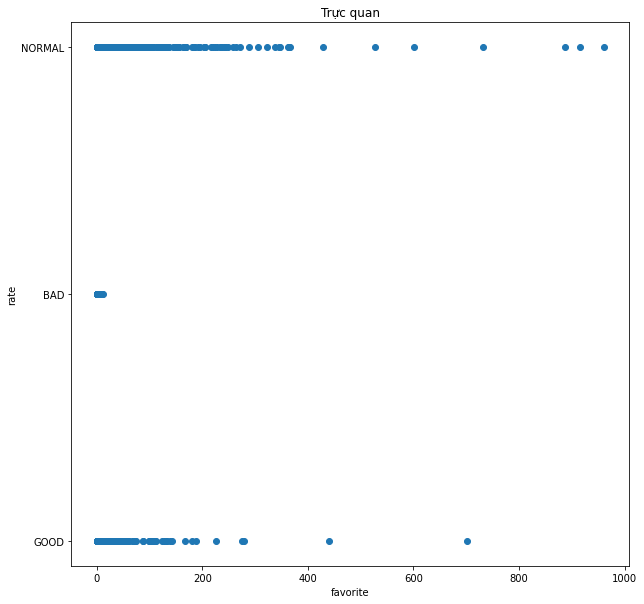

In [144]:
# FIELD : favorite

# Loại bỏ các record nan
tmp1 = tmp.dropna(subset=["favorite"])
X = tmp1[["favorite"]]
y = tmp1["f_rate"]

# Chia 80:20
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

# Tạo model logistic đa lớp với thuật toán cực tiểu hóa: lbfgs, lặp 1e4
model2 = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1e4)
model2.fit(train_X,train_y)

# Xem các tham số mô hình
print("Tham số mô hình:")
print(model2.coef_) #w_1...
print(model2.intercept_) #w_0
print()

# Xem trực quan dữ liệu
plt.figure(figsize=(10,10))
plt.scatter(train_X["favorite"],train_y)
plt.xlabel("favorite")
plt.ylabel("rate")
plt.title("Trực quan")

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != model2.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != model2.predict(test_X)))
print()

Nhận xét: 
- Độ lỗi của mô hình không cao lắm, tuy nhiên vẫn rất khó xác định được phân lớp của ouput
- Việc chia training và test set không ảnh hưởng quá nhiều tới kết quả

Tham số mô hình:
[[ 0.03178305]
 [-0.02795663]
 [-0.00382642]]
[-0.39826035  0.27248163  0.12577872]

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.5880102040816326
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.5749235474006116



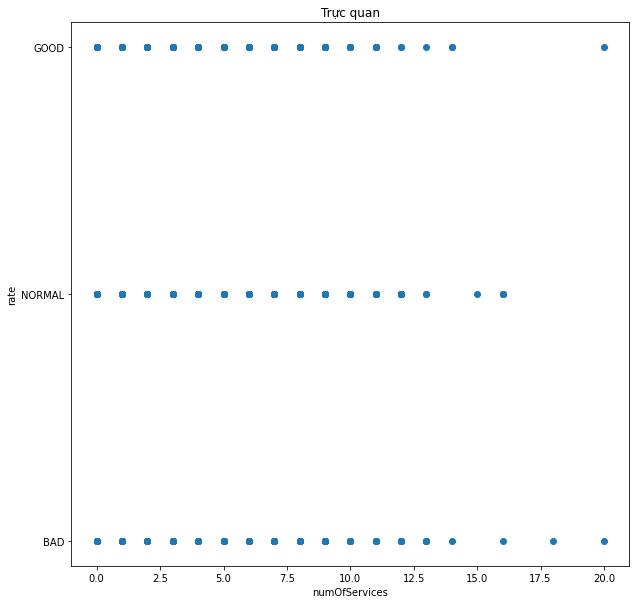

In [145]:
# FIELD : numOfServices

# Loại bỏ các record nan
tmp1 = tmp.dropna(subset=["numOfServices"])
X = tmp1[["numOfServices"]]
y = tmp1["f_rate"]

# Chia 80:20
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

# Tạo model logistic đa lớp với thuật toán cực tiểu hóa: lbfgs, lặp 1e4
model2 = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1e4)
model2.fit(train_X,train_y)

# Xem các tham số mô hình
print("Tham số mô hình:")
print(model2.coef_) #w_1...
print(model2.intercept_) #w_0
print()

# Xem trực quan dữ liệu
plt.figure(figsize=(10,10))
plt.scatter(train_X["numOfServices"],train_y)
plt.xlabel("numOfServices")
plt.ylabel("rate")
plt.title("Trực quan")

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != model2.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != model2.predict(test_X)))
print()

Nhận xét: 
- Độ lỗi của mô hình cao hơn cả baseline, không khả quan khi áp dụng
- Việc chia training và test set không ảnh hưởng quá nhiều tới kết quả

Ta xem xét đến việc kết hợp 2 fields có chất lượng tốt lại với nhau để kiểm tra kết quả mới

In [146]:
# FIELD : rate_count, favorite

# Loại bỏ các record nan
tmp1 = tmp.dropna(subset=["rate_count","favorite"])
X = tmp1[["rate_count","favorite"]]
y = tmp1["f_rate"]

# Chia 80:20
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

# Tạo model
model2 = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1e4)
model2.fit(train_X,train_y)

# Xem các tham số mô hình
print("Tham số mô hình:")
print(model2.coef_) #w_1...
print(model2.intercept_) #w_0
print()

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != model2.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != model2.predict(test_X)))
print()

Tham số mô hình:
[[-1.36986532 -0.13450414]
 [ 0.67726014  0.06722196]
 [ 0.69260517  0.06728218]]
[ 1.74316217 -0.9822492  -0.76091297]

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.31268071045022716
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.31518151815181517



Nhận xét: 
- Độ lỗi của mô hình có kết quả sấp xỉ với cả mô hình chỉ sử dụng 1 field
- Việc chia training và test set không ảnh hưởng quá nhiều tới kết quả

Ta thử kết hợp cả 3 fields lại với nhau để kiểm tra kết quả mới có cải thiện được gì không?

In [149]:
# FIELD : rate_count, favorite, numOfServices

# Loại bỏ các record nan
tmp1 = tmp.dropna(subset=["rate_count","favorite","numOfServices"])
X = tmp1[["rate_count","favorite","numOfServices"]]
y = tmp1["f_rate"]

# Chia 80:20
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

# Tạo model
model2 = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1e4)
model2.fit(train_X,train_y)

# Xem các tham số mô hình
print("Tham số mô hình:")
print(model2.coef_) #w_1...
print(model2.intercept_) #w_0
print()

# # Xem trực quan dữ liệu
# plt.figure(figsize=(10,10))
# plt.scatter(train_X["numOfServices"],train_y)
# plt.xlabel("numOfServices")
# plt.ylabel("rate")
# plt.title("Trực quan")

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != model2.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != model2.predict(test_X)))
print()

Tham số mô hình:
[[-1.21933151 -0.13057601  0.0764095 ]
 [ 0.60187481  0.06468    -0.01356279]
 [ 0.6174567   0.065896   -0.06284671]]
[ 1.49068526 -0.91545231 -0.57523295]

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.31061544816191655
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.297029702970297



Nhận xét: 
- Độ lỗi của mô hình có kết quả tốt hơn một chút với mô hình chỉ sử dụng 1 field và 2 field
- Việc chia training và test set không ảnh hưởng quá nhiều tới kết quả

Ta sử dụng thêm mạng neural để tối ưu hóa và học trên cả 3 fields

In [151]:
# Tạo mạng neural network với các tham số :
# tầng ẩn thứ nhất gồm 25 noron, hàm kích hoạt: tanh
# tầng ẩn thứ hai gồm 9 noron, hàm kích hoạt: tanh
# Thuật toán cực tiểu hóa: LBFGS, số vòng lặp tối đa: 1000
neural_net_model = MLPClassifier(hidden_layer_sizes=(25,9),activation="tanh",
                                solver="lbfgs", max_iter=1000,random_state=0)

# Loại bỏ các record nan
tmp1 = tmp.dropna(subset=["rate_count","favorite","numOfServices"])
X = tmp1[["rate_count","favorite","numOfServices"]]
y = tmp1["f_rate"]

# Fit mô hình vào tập huấn luyện
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)
neural_net_model.fit(train_X,train_y)

# Kiểm tra độ đo lỗi
print("Độ lỗi trên tập train:")
print("Phần trăm phân lớp sai:", np.mean(train_y != neural_net_model.predict(train_X)))
print("Độ lỗi trên tập test:")
print("Phần trăm phân lớp sai:", np.mean(test_y != neural_net_model.predict(test_X)))
print()

Độ lỗi trên tập train:
Phần trăm phân lớp sai: 0.20693928128872366
Độ lỗi trên tập test:
Phần trăm phân lớp sai: 0.2722772277227723



C:\Users\thafnhlong\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Nhận xét: 
- Độ lỗi của mô hình neural network có kết quả tốt nhất
- Việc chia training và test set không ảnh hưởng quá nhiều tới kết quả

Kết luận:
- Có thể thấy độ lỗi phân lớp cả 2 phương pháp (softmax,neural) có giá trị khá nhỏ đó cũng là một dấu hiệu tốt cho thấy việc học máy hiệu quả.
- Dựa vào tham số đã xác định được qua model thì ta có thể thấy rằng với `rate_count`, `favorite`, `numOfServices` có thể xác đinh được phân lớp đánh giá `rate` ("BAD","NORMAL","GOOD").
- Vậy mô hình đã giải quyết được bài toán mà chúng ta đã đề ra ban đầu